In [ ]:
# setup 
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
def load_spam_data(dataframe):
    dataframe = pd.read_csv(dataframe,delim_whitespace = False, header = None)
    dataframe = dataframe.replace("?", np.NAN)
    dataframe = dataframe.values

#Split the data into spam and non_spam datasets, such that the training and testing subset contains the same amount of spam and non_spam data    
    not_spam, spam = np.split(dataframe, np.where(np.diff(dataframe[:,57]))[0]+1)
    train_ns_emails = not_spam[:1500]
    test_ns_emails = not_spam[1500:]
    train_s_emails = spam[:2500]
    test_s_emails = spam[2500:]
    train_data = np.vstack([train_ns_emails, train_s_emails])[:,:57]
    test_data = np.vstack([test_ns_emails, test_s_emails])[:,:57]
    train_labels = np.vstack([train_ns_emails, train_s_emails])[:,57]
    test_labels = np.vstack([test_ns_emails, test_s_emails])[:,57]
    return (train_data,train_labels),(test_data, test_labels)

In [ ]:
#Load spambase data and split into training and testing set
(train_emails,train_labels),(test_emails,test_labels) = load_spam_data("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [ ]:
print(train_emails.shape)
print(test_emails.shape)

(4000, 57)
(601, 57)


In [ ]:
#Find the mean and Standard deviation of training emails 
# The data can be normalized by subtracting the mean (µ) of each feature and a division by the standard deviation (σ). 
mean = train_emails.mean(axis = 0)
std = train_emails.std(axis=0)
train_emails = train_emails-mean
train_emails = train_emails/std
test_emails = test_emails-mean
test_emails = test_emails/std

In [ ]:
x_val = train_emails[:500]
partial_x_train = train_emails[500:]

y_val = train_labels[:500]
partial_y_train = train_labels[500:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=RMSprop(lr=0.001),loss="binary_crossentropy",metrics=["binary_accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# train the model using fit() function for partial training data with a batch 	size of 32 and 50 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=32,
                   validation_data=(x_val,y_val))

Epoch 1/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0729 - binary_accuracy: 0.9786 - val_loss: 0.5533 - val_binary_accuracy: 0.8800
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0718 - binary_accuracy: 0.9771 - val_loss: 0.5445 - val_binary_accuracy: 0.8840
Epoch 3/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0708 - binary_accuracy: 0.9780 - val_loss: 0.5729 - val_binary_accuracy: 0.8720
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0695 - binary_accuracy: 0.9789 - val_loss: 0.5674 - val_binary_accuracy: 0.8800
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0691 - binary_accuracy: 0.9789 - val_loss: 0.6071 - val_binary_accuracy: 0.8740
Epoch 6/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0681 - binary_accuracy: 0.9789 - val_loss: 0.5463 - val_binary_accuracy: 0.8860
Epoch 7/50
110/110 [==============================] - 0s 2ms/ste

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

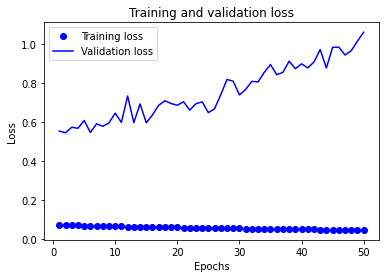

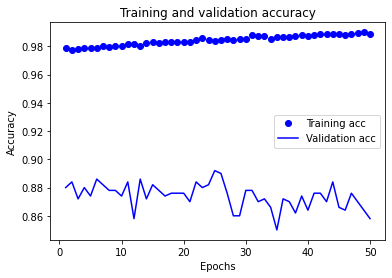

In [ ]:
#plot training and validation loss with respect to epochs

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"])

history = model.fit(train_emails,
                    train_labels,
                    epochs=30,
                    batch_size=512)
results = model.evaluate(test_emails,test_labels)
results

Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 0.6975 - binary_accuracy: 0.5443
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6119 - binary_accuracy: 0.6957
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5550 - binary_accuracy: 0.7815
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5056 - binary_accuracy: 0.8303
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4610 - binary_accuracy: 0.8583
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4206 - binary_accuracy: 0.8777
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3833 - binary_accuracy: 0.8875
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3498 - binary_accuracy: 0.8967
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3202 - binary_accuracy: 0.9068
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.

[0.4691242277622223, 0.8569051623344421]

In [ ]:
model.save('spam_classify.hdf5')
model.load_weights('spam_classify.hdf5')
model.predict(test_emails)

array([[9.96344447e-01],
       [9.92914319e-01],
       [9.95847583e-01],
       [8.75181198e-01],
       [4.45937872e-01],
       [9.97132897e-01],
       [6.13709688e-02],
       [8.91814351e-01],
       [9.05344248e-01],
       [9.95894909e-01],
       [9.97751236e-01],
       [4.05512780e-01],
       [9.99407172e-01],
       [9.86882091e-01],
       [1.09588653e-01],
       [9.89524722e-01],
       [1.08601570e-01],
       [3.45018387e-01],
       [9.47621226e-01],
       [6.83907509e-01],
       [8.85317385e-01],
       [4.28898633e-02],
       [3.30987930e-01],
       [9.96473253e-01],
       [8.85317385e-01],
       [8.60414147e-01],
       [7.65732884e-01],
       [9.84679401e-01],
       [9.96338785e-01],
       [9.95262980e-01],
       [9.05974627e-01],
       [9.40446377e-01],
       [9.99998391e-01],
       [4.08800811e-01],
       [9.92603421e-01],
       [9.41466093e-01],
       [9.97100472e-01],
       [9.41466093e-01],
       [9.67066467e-01],
       [9.99542952e-01],
